<h3>3 conv 64 filters 1 dense with 64 nodes</h3>
<h3>Accuracy: 95.5%</h3>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # !unzip "/content/drive/MyDrive/Potato-20220304T040717Z-001.zip" -d "/content"
# !unrar x "/content/drive/MyDrive/Potato.rar" "/content/Potato/"

In [ ]:
# import os
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# from tqdm import tqdm
# import random

(256, 256, 3)


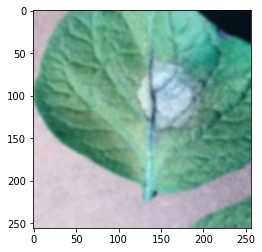

In [ ]:
# data_path = '/content/Potato/'
# # valid_path = '/content/drive/MyDrive/Potato/Validation'
# categories = os.listdir(data_path)
# for category in categories:
#   path = os.path.join(data_path, category)
#   for img in os.listdir(path):
#     img_array = cv2.imread(os.path.join(path, img))
#     new_array = cv2.resize(img_array, (256, 256))
#     print(np.array(new_array).shape)
#     plt.imshow(new_array, cmap='gray')
#     break
#   break

In [ ]:
# IMG_SIZE = 128

# training_set = []

# for category in categories:
#   path = os.path.join(data_path, category)
#   index = categories.index(category)
#   for img in tqdm(os.listdir(path)):
#     try:
#       img_array = cv2.imread(os.path.join(path, img))
#       new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#       training_set.append([new_array, index])
#     except Exception as e:
#         pass


100%|██████████| 1560/1560 [00:01<00:00, 1216.40it/s]


In [ ]:
# random.shuffle(training_set)

In [ ]:
# x_train = []
# y_train = []

# for img_array, label in training_set:
#   x_train.append(img_array)
#   y_train.append(label)

In [ ]:
# np.array(x_train).shape

(4682, 128, 128, 3)

In [ ]:
# X_train =  np.array(x_train).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
# y_train = np.array(y_train)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
#                                                     test_size = 0.2,
#                                                     random_state = 1)

In [ ]:
# X_test =  np.array(X_test).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
# y_test = np.array(y_test)

In [ ]:
# X_train = X_train/255.0

In [ ]:
# X_train.shape


(4682, 128, 128, 3)

In [2]:
import pickle
X = pickle.load(open('/content/drive/MyDrive/Dataset/Potato/Potato_X.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Dataset/Potato/Potato_y.pickle', 'rb'))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
del X
del y

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import TensorBoard
import time
%load_ext tensorboard


In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [7]:
dense_layers = [1]
layer_sizes = [64]
conv_layers = [3]


for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
      tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

      print(NAME)

      #model initialzation
      model = Sequential()

      #model definition
      model.add(Conv2D(layer_size, (3,3), input_shape = X_train.shape[1:], padding='SAME'))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2,2)))

      for l in range(conv_layer-1):
        model.add(Conv2D(layer_size, (3,3), padding='SAME'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))

      model.add(Flatten())

      for l in range(dense_layer):
        model.add(Dense(layer_size))
        model.add(Activation('relu'))


      #final output layer
      model.add(Dense(3))
      model.add(Activation('softmax'))

      #settings
      model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
      #fit
      model.fit(X_train, y_train, batch_size=16, epochs=20, callbacks=[tensorboard])
      # model.fit(X, y, batch_size=8, epochs=25, validation_split=0.2)


3-conv-64-nodes-1-dense-1688539641
Epoch 1/20
235/235 [==============================] - 21s 34ms/step - loss: 0.7528 - accuracy: 0.6182
Epoch 2/20
235/235 [==============================] - 8s 34ms/step - loss: 0.3047 - accuracy: 0.8774
Epoch 3/20
235/235 [==============================] - 8s 33ms/step - loss: 0.2436 - accuracy: 0.9073
Epoch 4/20
235/235 [==============================] - 8s 33ms/step - loss: 0.1487 - accuracy: 0.9437
Epoch 5/20
235/235 [==============================] - 8s 34ms/step - loss: 0.1402 - accuracy: 0.9458
Epoch 6/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0984 - accuracy: 0.9650
Epoch 7/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0783 - accuracy: 0.9706
Epoch 8/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0478 - accuracy: 0.9800
Epoch 9/20
235/235 [==============================] - 8s 34ms/step - loss: 0.1274 - accuracy: 0.9607
Epoch 10/20
235/235 [==============================] - 

In [8]:
del X_train
del y_train

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

30/30 [==============================] - 2s 32ms/step - loss: 0.1244 - accuracy: 0.9744
Test Loss: 0.12438524514436722
Test Accuracy: 0.9743863344192505


In [10]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Test set metrics
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

test_precision = precision_score(y_test, test_pred, average='macro')
test_recall = recall_score(y_test, test_pred, average='macro')
test_f1_score = f1_score(y_test, test_pred, average='macro')

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


30/30 [==============================] - 1s 27ms/step
Test Precision: 0.9743013959590526
Test Recall: 0.9741840792229718
Test F1 Score: 0.9741565064222156


30/30 [==============================] - 1s 26ms/step


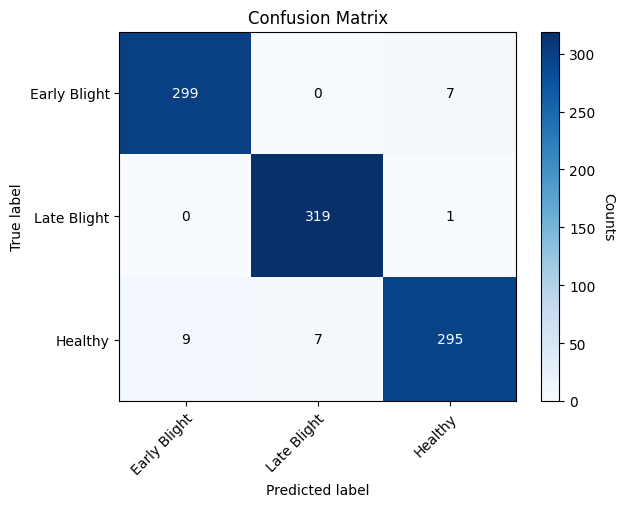

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain predictions for the test set
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")

# Set axis labels and title
class_names = ['Early Blight', 'Late Blight', 'Healthy']  # Replace with your class names
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='auto')

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()


In [ ]:
# model.save('3-conv-1-dense-64-nodes-95-per-cent-potato-augmented.h5')  # creates a HDF5 file 'my_model.h5'